<a href="https://colab.research.google.com/github/dyahyn/Portofolio/blob/main/training_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Training Dataset**
Calling the json file then put the feature into neural network

In [12]:
#import related packages
!pip3 install keras-visualizer

import numpy as np
import json
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras_visualizer import visualizer

DATA_PATH = "/content/drive/MyDrive/BANGKIT_CAPSTONE/data.json"
SAVED_MODEL_PATH = "/content/drive/MyDrive/BANGKIT_CAPSTONE/training_model.h5"
EPOCHS = 100
BATCH_SIZE = 32
PATIENCE = 20
LEARNING_RATE = 0.0001

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [13]:
def prepare_dataset(data_path, test_size=0.1, validation_size=0.1):
    # load dataset
    X, y = load_data(data_path)

    # create train, validation, test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)
    X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=validation_size)

    # add an axis to nd array
    X_train = X_train[..., np.newaxis]
    X_test = X_test[..., np.newaxis]
    X_validation = X_validation[..., np.newaxis]

    return X_train, y_train, X_validation, y_validation, X_test, y_test

In [14]:
def load_data(data_path):
    with open(data_path, "r") as fp:
        data = json.load(fp)

    X = np.array(data["MFCCs"])
    y = np.array(data["labels"])
    print("Training sets loaded!")
    return X, y

In [16]:
def build_model(input_shape, loss="sparse_categorical_crossentropy", learning_rate=0.0001):
    
    # build network architecture using convolutional layers
    model = tf.keras.models.Sequential()

    # 1st conv layer
    model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=input_shape,
                                     kernel_regularizer=tf.keras.regularizers.l2(0.00001)))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.MaxPooling2D((2, 2), strides=(2,2), padding='same'))

    tf.keras.layers.Dropout(0.3)

    # 2nd conv layer
    model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu',
                                     kernel_regularizer=tf.keras.regularizers.l2(0.00001)))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.MaxPooling2D((2, 2), strides=(2,2), padding='same'))

    tf.keras.layers.Dropout(0.2)


    # flatten output and feed into dense layer
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(64, activation='relu'))
    tf.keras.layers.Dropout(0.3)

    # softmax output layer
    model.add(tf.keras.layers.Dense(4, activation='softmax'))

    optimiser = tf.optimizers.Adam(learning_rate=learning_rate)

    # compile model
    model.compile(optimizer=optimiser,
                  loss=loss,
                  metrics=["accuracy"])

    # print model parameters on console
    model.summary()

    return model


In [17]:

def train(model, epochs, batch_size, patience, X_train, y_train, X_validation, y_validation):
    
    earlystop_callback = tf.keras.callbacks.EarlyStopping(monitor="val_accuracy", min_delta=0.001, patience=patience)

    # train model
    history = model.fit(X_train,
                        y_train,
                        epochs=epochs,
                        batch_size=batch_size,
                        validation_data=(X_validation, y_validation),
                        callbacks=[earlystop_callback])
    return history

In [18]:
def plot_history(history):
    
    fig, axs = plt.subplots(2)

    plt.figure(figsize=(5,10))

    # create accuracy subplot
    axs[0].plot(history.history["accuracy"], label="accuracy")
    axs[0].plot(history.history['val_accuracy'], label="val_accuracy")
    axs[0].set_ylabel("Accuracy")
    axs[0].legend(loc="lower right")
    axs[0].set_title("Accuracy evaluation")

    # create loss subplot
    axs[1].plot(history.history["loss"], label="loss")
    axs[1].plot(history.history['val_loss'], label="val_loss")
    axs[1].set_xlabel("Epoch")
    axs[1].set_ylabel("Loss")
    axs[1].legend(loc="upper right")
    axs[1].set_title("Loss evaluation")

    

    plt.show()

In [19]:
X_train, y_train, X_validation, y_validation, X_test, y_test = prepare_dataset(DATA_PATH)

Training sets loaded!


In [20]:
input_shape = (X_train.shape[1], X_train.shape[2], 1)
model = build_model(input_shape, learning_rate=LEARNING_RATE)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 42, 11, 64)        640       
                                                                 
 batch_normalization_2 (Batc  (None, 42, 11, 64)       256       
 hNormalization)                                                 
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 21, 6, 64)        0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 19, 4, 32)         18464     
                                                                 
 batch_normalization_3 (Batc  (None, 19, 4, 32)        128       
 hNormalization)                                                 
                                                      

In [21]:

print(X_train.shape)

print(input_shape)

(259, 44, 13, 1)
(44, 13, 1)


In [22]:
history = train(model, EPOCHS, BATCH_SIZE, PATIENCE, X_train, y_train, X_validation, y_validation)

Epoch 1/100
9/9 [==============================] - 1s 64ms/step - loss: 1.9703 - accuracy: 0.2008 - val_loss: 2.6870 - val_accuracy: 0.2759
Epoch 2/100
9/9 [==============================] - 0s 44ms/step - loss: 1.5845 - accuracy: 0.2934 - val_loss: 2.1125 - val_accuracy: 0.2069
Epoch 3/100
9/9 [==============================] - 0s 40ms/step - loss: 1.4439 - accuracy: 0.3436 - val_loss: 1.8840 - val_accuracy: 0.2414
Epoch 4/100
9/9 [==============================] - 0s 42ms/step - loss: 1.3052 - accuracy: 0.4054 - val_loss: 1.7096 - val_accuracy: 0.2759
Epoch 5/100
9/9 [==============================] - 0s 42ms/step - loss: 1.2001 - accuracy: 0.4440 - val_loss: 1.5837 - val_accuracy: 0.2759
Epoch 6/100
9/9 [==============================] - 0s 43ms/step - loss: 1.1366 - accuracy: 0.4788 - val_loss: 1.5113 - val_accuracy: 0.3448
Epoch 7/100
9/9 [==============================] - 0s 42ms/step - loss: 1.0898 - accuracy: 0.5174 - val_loss: 1.4711 - val_accuracy: 0.3448
Epoch 8/100
9/9 [===

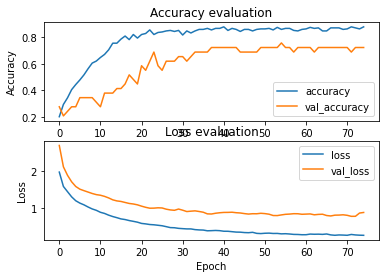

<Figure size 360x720 with 0 Axes>

In [23]:
plot_history(history)

In [24]:
test_loss, test_acc = model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 366ms/step - loss: 1.0017 - accuracy: 0.6562


In [25]:
model.save(SAVED_MODEL_PATH)

## **Prediction**
Try the model to predict

In [32]:
import librosa
panjang_sampel=22050
#preprocess the input sample function
def preprocess(file_path, num_mfcc=13, n_fft=2048, hop_length=512):
        """Extract MFCCs from audio file.
        :param file_path (str): Path of audio file
        :param num_mfcc (int): # of coefficients to extract
        :param n_fft (int): Interval we consider to apply STFT. Measured in # of samples
        :param hop_length (int): Sliding window for STFT. Measured in # of samples
        :return MFCCs (ndarray): 2-dim array with MFCC data of shape (# time steps, # coefficients)
        """

        # load audio file
        signal, sample_rate = librosa.load(file_path)

        if len(signal) >= panjang_sampel:
            # ensure consistency of the length of the signal
            signal = signal[:panjang_sampel]

            # extract MFCCs
            MFCCs = librosa.feature.mfcc(signal, sample_rate, n_mfcc=num_mfcc, n_fft=n_fft,
                                         hop_length=hop_length)
        return MFCCs.T

In [33]:
loaded=tf.keras.models.load_model(SAVED_MODEL_PATH)

In [34]:
def predict(file_path):
       
        # extract MFCC
        MFCCs = preprocess(file_path)

        # we need a 4-dim array to feed to the model for prediction: (# samples, # time steps, # coefficients, 1)
        MFCCs = MFCCs[np.newaxis, ..., np.newaxis]

        # get the predicted label
        predictions = loaded.predict(MFCCs)

        return predictions

In [41]:
tes=predict("/content/drive/MyDrive/BANGKIT_CAPSTONE/dataset/testing2.ogg")
tes

/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


array([[9.3971056e-01, 7.2601036e-04, 4.2593643e-02, 1.6969845e-02]],
      dtype=float32)

In [43]:
print("Prediksi Kekerasan: \n")
print("Seksual: "+str(tes[0,0]*100)+"%")
print("Penguntitan: "+str(tes[0,1]*100)+"%")
print("Fisik: "+str(tes[0,2]*100)+"%")
print("Domestik: "+str(tes[0,3]*100)+"%")

Prediksi Kekerasan: 

Seksual: 93.97105574607849%
Penguntitan: 0.07260103593580425%
Fisik: 4.259364306926727%
Domestik: 1.6969844698905945%
